In [1]:
# Import libraries
import os
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite as bp

In [34]:
# fake bipartite (2-mode) network
n, k = 100, 50
bottom_nodes = np.arange(0, n)
top_nodes = np.arange(n, n+k)

In [35]:
bottom_nodes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [36]:
top_nodes

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149])

In [37]:
edges = []
for i in bottom_nodes:
    # level of activity
    degree = np.random.poisson(lam=3, size=1)
    # alters
    alters = np.random.choice(top_nodes, size=degree)
    # add edges
    for alter in alters:
        edges.append((i, alter))
 


In [38]:
# initializing the networkx graph
bg = nx.Graph()

In [39]:
# add nodes
bg.add_nodes_from(bottom_nodes, bipartite=0)
bg.add_nodes_from(top_nodes, bipartite=1)

In [40]:
# add edges
bg.add_edges_from(edges)

In [41]:
# check bg is bipartite
bp.is_bipartite(bg)

True

In [42]:
# reverse engineering
bp.sets(bg)

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

In [43]:
nx.is_connected(bg)

False

In [44]:
# projection
g_b = bp.projected_graph(bg, bottom_nodes)

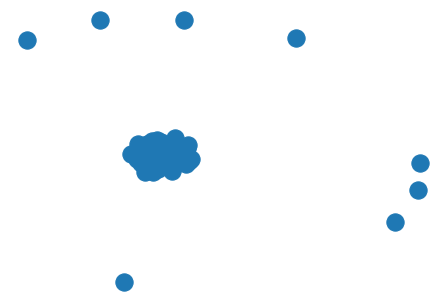

In [45]:
nx.draw(g_b)

In [46]:
g_t = bp.projected_graph(bg, top_nodes)

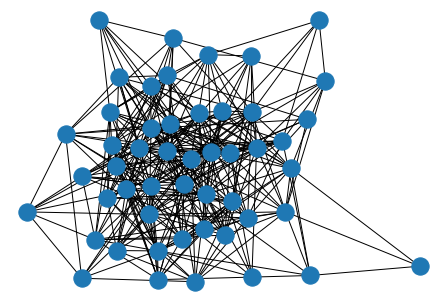

In [48]:
nx.draw(g_t)

In [25]:
# weighted projection
g_b_w = bp.weighted_projected_graph(bg, bottom_nodes)
g_t_w = bp.weighted_projected_graph(bg, top_nodes)

In [31]:
list(g_t_w.edges(data=True))

[(100, 101, {'weight': 6}),
 (100, 102, {'weight': 6}),
 (100, 103, {'weight': 3}),
 (100, 104, {'weight': 5}),
 (100, 105, {'weight': 3}),
 (100, 106, {'weight': 5}),
 (100, 107, {'weight': 5}),
 (100, 108, {'weight': 6}),
 (100, 109, {'weight': 5}),
 (101, 102, {'weight': 5}),
 (101, 103, {'weight': 3}),
 (101, 104, {'weight': 5}),
 (101, 105, {'weight': 10}),
 (101, 106, {'weight': 8}),
 (101, 107, {'weight': 9}),
 (101, 108, {'weight': 5}),
 (101, 109, {'weight': 9}),
 (102, 103, {'weight': 8}),
 (102, 104, {'weight': 7}),
 (102, 105, {'weight': 7}),
 (102, 106, {'weight': 10}),
 (102, 107, {'weight': 4}),
 (102, 108, {'weight': 9}),
 (102, 109, {'weight': 10}),
 (103, 104, {'weight': 6}),
 (103, 105, {'weight': 5}),
 (103, 106, {'weight': 4}),
 (103, 107, {'weight': 1}),
 (103, 108, {'weight': 7}),
 (103, 109, {'weight': 8}),
 (104, 105, {'weight': 8}),
 (104, 106, {'weight': 4}),
 (104, 107, {'weight': 9}),
 (104, 108, {'weight': 8}),
 (104, 109, {'weight': 6}),
 (105, 106, {'wei

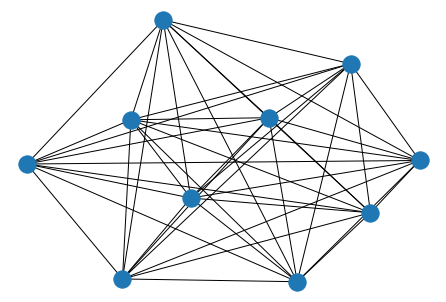

In [26]:
nx.draw(g_t_w)

In [27]:
# fake network
B = nx.path_graph(4)
G = bp.weighted_projected_graph(B, [1, 3])

list(G)

list(G.edges(data=True))

[(1, 3, {'weight': 1})]

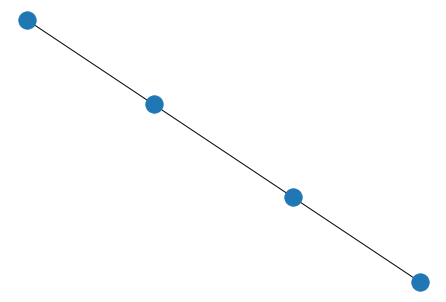

In [30]:
nx.draw(B)

In [29]:
G = bp.weighted_projected_graph(B, [1, 3], ratio=True)
list(G.edges(data=True))

[(1, 3, {'weight': 0.5})]